# Laboratorio Aprendizaje automático - Árboles de decision y Random forest

- __Ejemplo de Preparación de datos + Análisis exploratorio de los datos__
- __Explicación de la actividad__

> _The most difficult thing in life is to know yourself - Tales de Mileto_

## Referencias recomendadas
* Hair, J. F., Black, W. C., Babin, B. J., Anderson, R. E., & Tatham, R. L. (1998). Multivariate data analysis (Vol. 5, No. 3, pp. 207-219). Upper Saddle River, NJ: Prentice hall. (Chapter 2)

* Larose, Daniel T., and Chantal D. Larose. Discovering Knowledge in Data : An Introduction to Data Mining, John Wiley & Sons, Incorporated, 2014. ProQuest Ebook Central. (En biblioteca UNIR).

* Larose, Daniel T., and Chantal D. Larose. Data Mining and Predictive Analytics, John Wiley & Sons, Incorporated, 2015. ProQuest Ebook Central. (En biblioteca UNIR).

## Ejemplo de Preparación de datos + Análisis exploratorio de los datos

El Análisis Exploratorio de Datos o en inglés Exploratory Data Analysis (EDA) es un método de análisis de los conjuntos de datos para resumir sus principales características.

El EDA se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar supuestos con ayuda de la estadística y representaciones gráficas.

**¿Qué es?**. Conjunto de técnicas estadísticas dirigidas a explorar, describir y resumir la información que contienen los
datos, maximizando su comprensión.

> Gracias al EDA podemos: 
> - Realizar un análisis descriptivo de los datos.
> - Identificar posibles errores.
> - Revelar la presencia de datos atípicos.
> - Comprobar la relación entre variables.

Preguntas que habitualmente haremos a los datos:
- ¿cuántos son y están todos?
- ¿cuál es el tipo de datos de cada columna?
- ¿existen registros nulos/perdidos/outliers?
- MLsupervised. features vs target
- MLsupervised - clasificación. ¿dataset balanceado?
- ¿qué features parecen ser las más relevantes? (distribución, correlación)

Después de realizar el EDA tenemos más información para abordar mejor la tarea de ML. Incluso para decidir si ML puede resolver la tarea o no.

_Nota: esta tarea puede llevar horas (o algún día)._

**¿Cuáles son los pasos a seguir??**

- Análisis descriptivo.
- Ajuste de tipos de variable.
- Detección y tratamiento de datos ausentes.
- Identificación de datos atípicos.
- Corrrelación de variables.

Datos de ejemplo: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
hourData = pd.read_csv('hour.csv')
hourData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Primeros pasos**

Conocer el número de filas y columnas para saber si se ha cargado completo el fichero, especialmente delicado en ficheros grandes, o para conocer si hay algún error en alguna linea.


In [3]:
hourData.shape

(17379, 17)

In [4]:
hourData.columns # nombre de las columnas

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

 Información general del DF, podemos inferir si hay valores nulos.

In [5]:
hourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Información estadística sobre el dataset.

Esta función muestra las caracterísitcas estadísticas básicas de cada variable numérica
_number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles._

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales. Utilizando cuartiles puede evaluar rápidamente la dispersión y la tendencia central de un conjunto de datos.


In [6]:
hourData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
#dteday es la fecha, lo toma como categoría, nos indica cuántos hay en cada categoría
hourData['dteday'].value_counts()

2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, Length: 731, dtype: int64

**Tomamos decisiones sobre los datos**

Normalizar las variables para que no afecten a aquellos algoritmos que las toman como de mayor importancia por tener valores grandes.

En este dataset se encuentra normalizada la temperatura

**Resumen**

Análisis descriptivo de los datos nos permite :
* localizar errores en nuestro conjunto de datos, 
* detectar valores faltantes en columnas y eliminarlas (e.g: 30% faltantes o más) (o decidir alternativas completar, etc...)
* analizar cómo se comportan las variables (distribuciones, tendencias, dependencias)

In [8]:
print(hourData['cnt'].describe())

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


**Preguntas finales**

¿Los datos coinciden con las expectativas? ¿Parece que existe un problema de recopilación de datos? ¿Una clase aparece más frecuente que las otras clases? ¿Hay más valores que faltan o datos no válidos que los que esperaba?

**Análisis exploratorio de los datos (EDA)**




In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

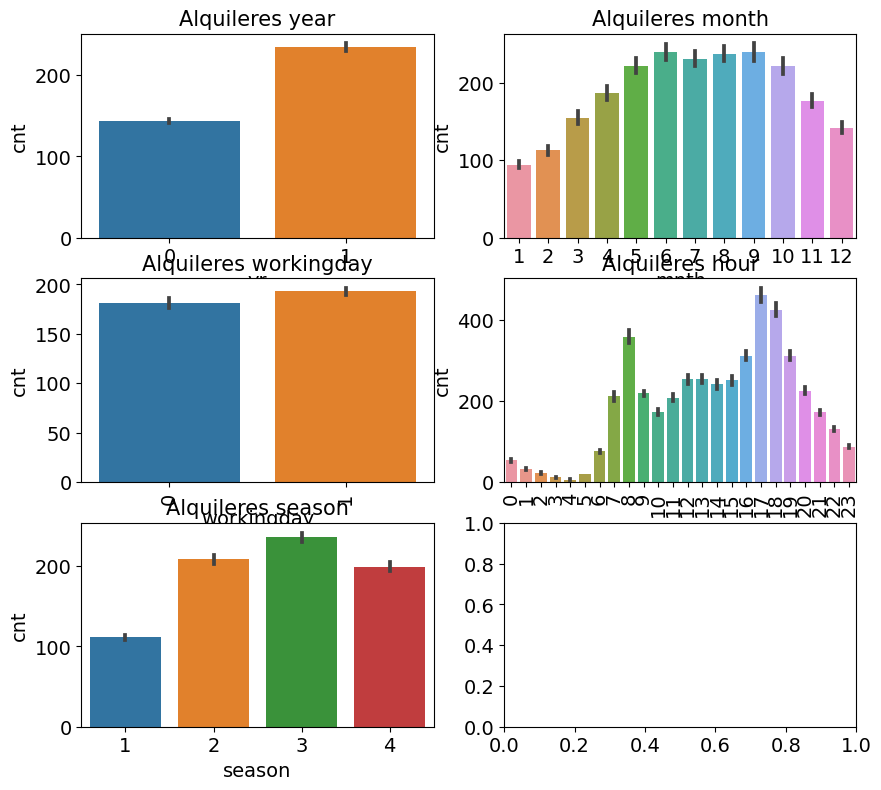

In [10]:
# Preparamos una figura de m x n
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2) # M 3rows 2columns
figure.set_size_inches(10, 9) # Tamaño total de la figura

# Distribución de alquileres según las features: season, month, day, hour, workingday

sns.barplot(x='yr', y='cnt', data=hourData, ax=axes[0, 0])
sns.barplot(x='mnth', y='cnt', data=hourData, ax=axes[0, 1])
sns.barplot(x='workingday', y='cnt', data=hourData, ax=axes[1, 0])
sns.barplot(x='hr', y='cnt', data=hourData, ax=axes[1, 1])
sns.barplot(x='season', y='cnt', data=hourData, ax=axes[2,0])

# Titulos
axes[0, 0].set(title='Alquileres year')
axes[0, 1].set(title='Alquileres month')
axes[1, 0].set(title='Alquileres workingday')
axes[1, 1].set(title='Alquileres hour')
axes[2, 0].set(title='Alquileres season')
# axes[2, 1].set(title='Alquileres by second')

# Rotamos 90 grados las etiquetas del eje x de la fila 1
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

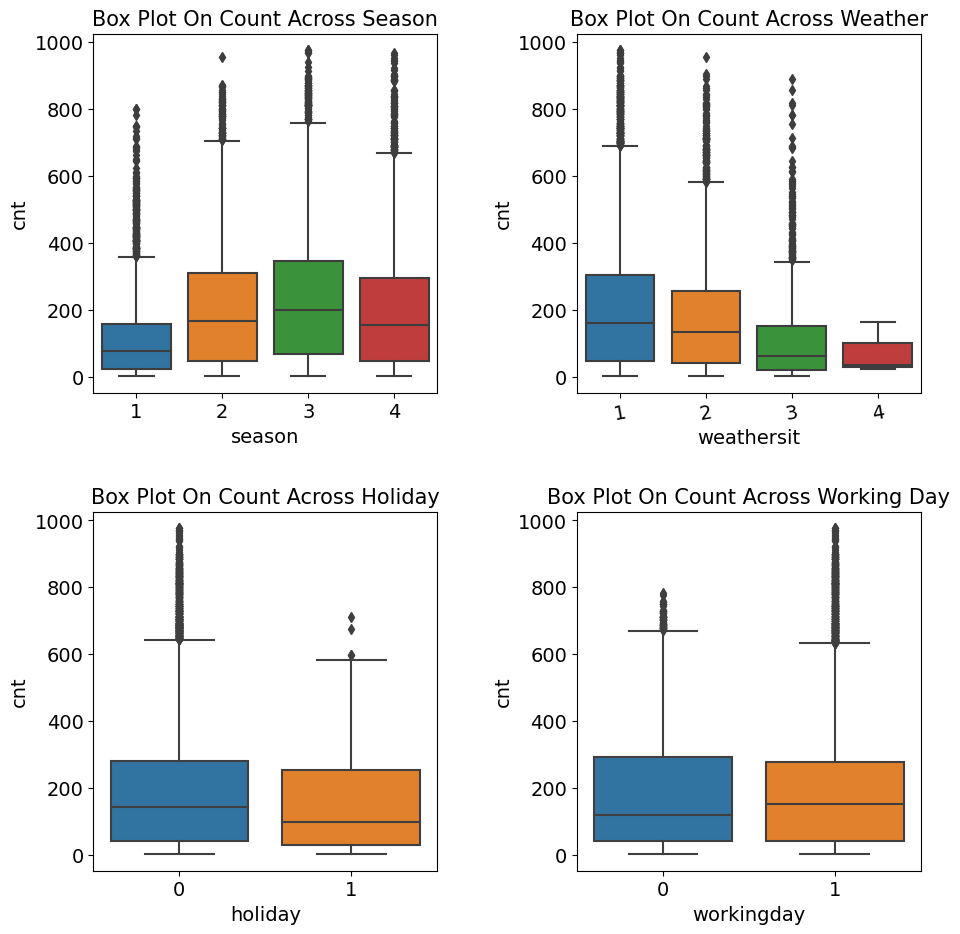

In [11]:
# Creamos una figura de 2x2
figure, axes = plt.subplots(nrows=2, ncols=2) # 2rows 2columns
plt.tight_layout()
figure.set_size_inches(10, 10)

# Step 2 : Creamos los subgráficos
# Gráfico de bigotes de los alquileres por season, weather, holiday, and workingday
sns.boxplot(x='season', y='cnt', data=hourData, ax=axes[0, 0])
sns.boxplot(x='weathersit', y='cnt', data=hourData, ax=axes[0, 1])
sns.boxplot(x='holiday', y='cnt', data=hourData, ax=axes[1, 0])
sns.boxplot(x='workingday', y='cnt', data=hourData, ax=axes[1, 1])

# Step 3: Configuración de los subgráficos
# titulo
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3.2 eliminar que se sobrepongan los titulos
axes[0, 1].tick_params('x', labelrotation=10) # rotate 10 degrees

Los gráficos de caja/bigotes (Box Plots) fueron originalmente desarrollados por M.E. Spear, permiten conocer cómo se distribuyen los datos dentro de una variable. 

A diferencia de los histogramas que requieren un tamaño de muestra de al menos 30 casos para ser útiles, los gráficos de caja pueden ser construidos con tan solo 5 casos y aportan más detalles acerca de las colas de la distribución.

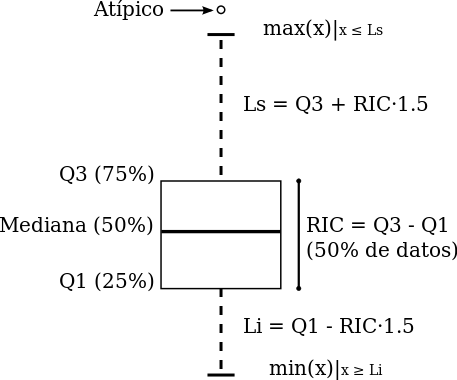

* Mediana. Valor que deja a la mitad de los casos por encima y a la otra mitad por debajo.
* Primer Cuartil (Q1). El 25% de los casos se encuentran por debajo de este valor.
* Tercer Cuartil (Q3). El 75% de los casos se encuentran por encima de este valor.
* Rango Intercuartílico (RIC). Es la diferencia entre el tercer y el primer cuartil.
* Límites Superior o Inferior (Ls o Li). Ls contiene los casos por encima de Q3 más 1,5 veces el rango intercuartílico o Li por debajo de Q1 – 1,5xRIC (Estilo de Tukey). Cuando los valores no son posibles en lugar de emplear la aproximación anterior se escogen los valores máximo o mínimo de la muestra (Estilo de Spears).

Los valores atípicos son aquellos que están más a allá de los límites inferior y superior. Cuando los valores atípicos están más allá de 3 veces el RIC en lugar del 1.5 son denominados valores extremos.

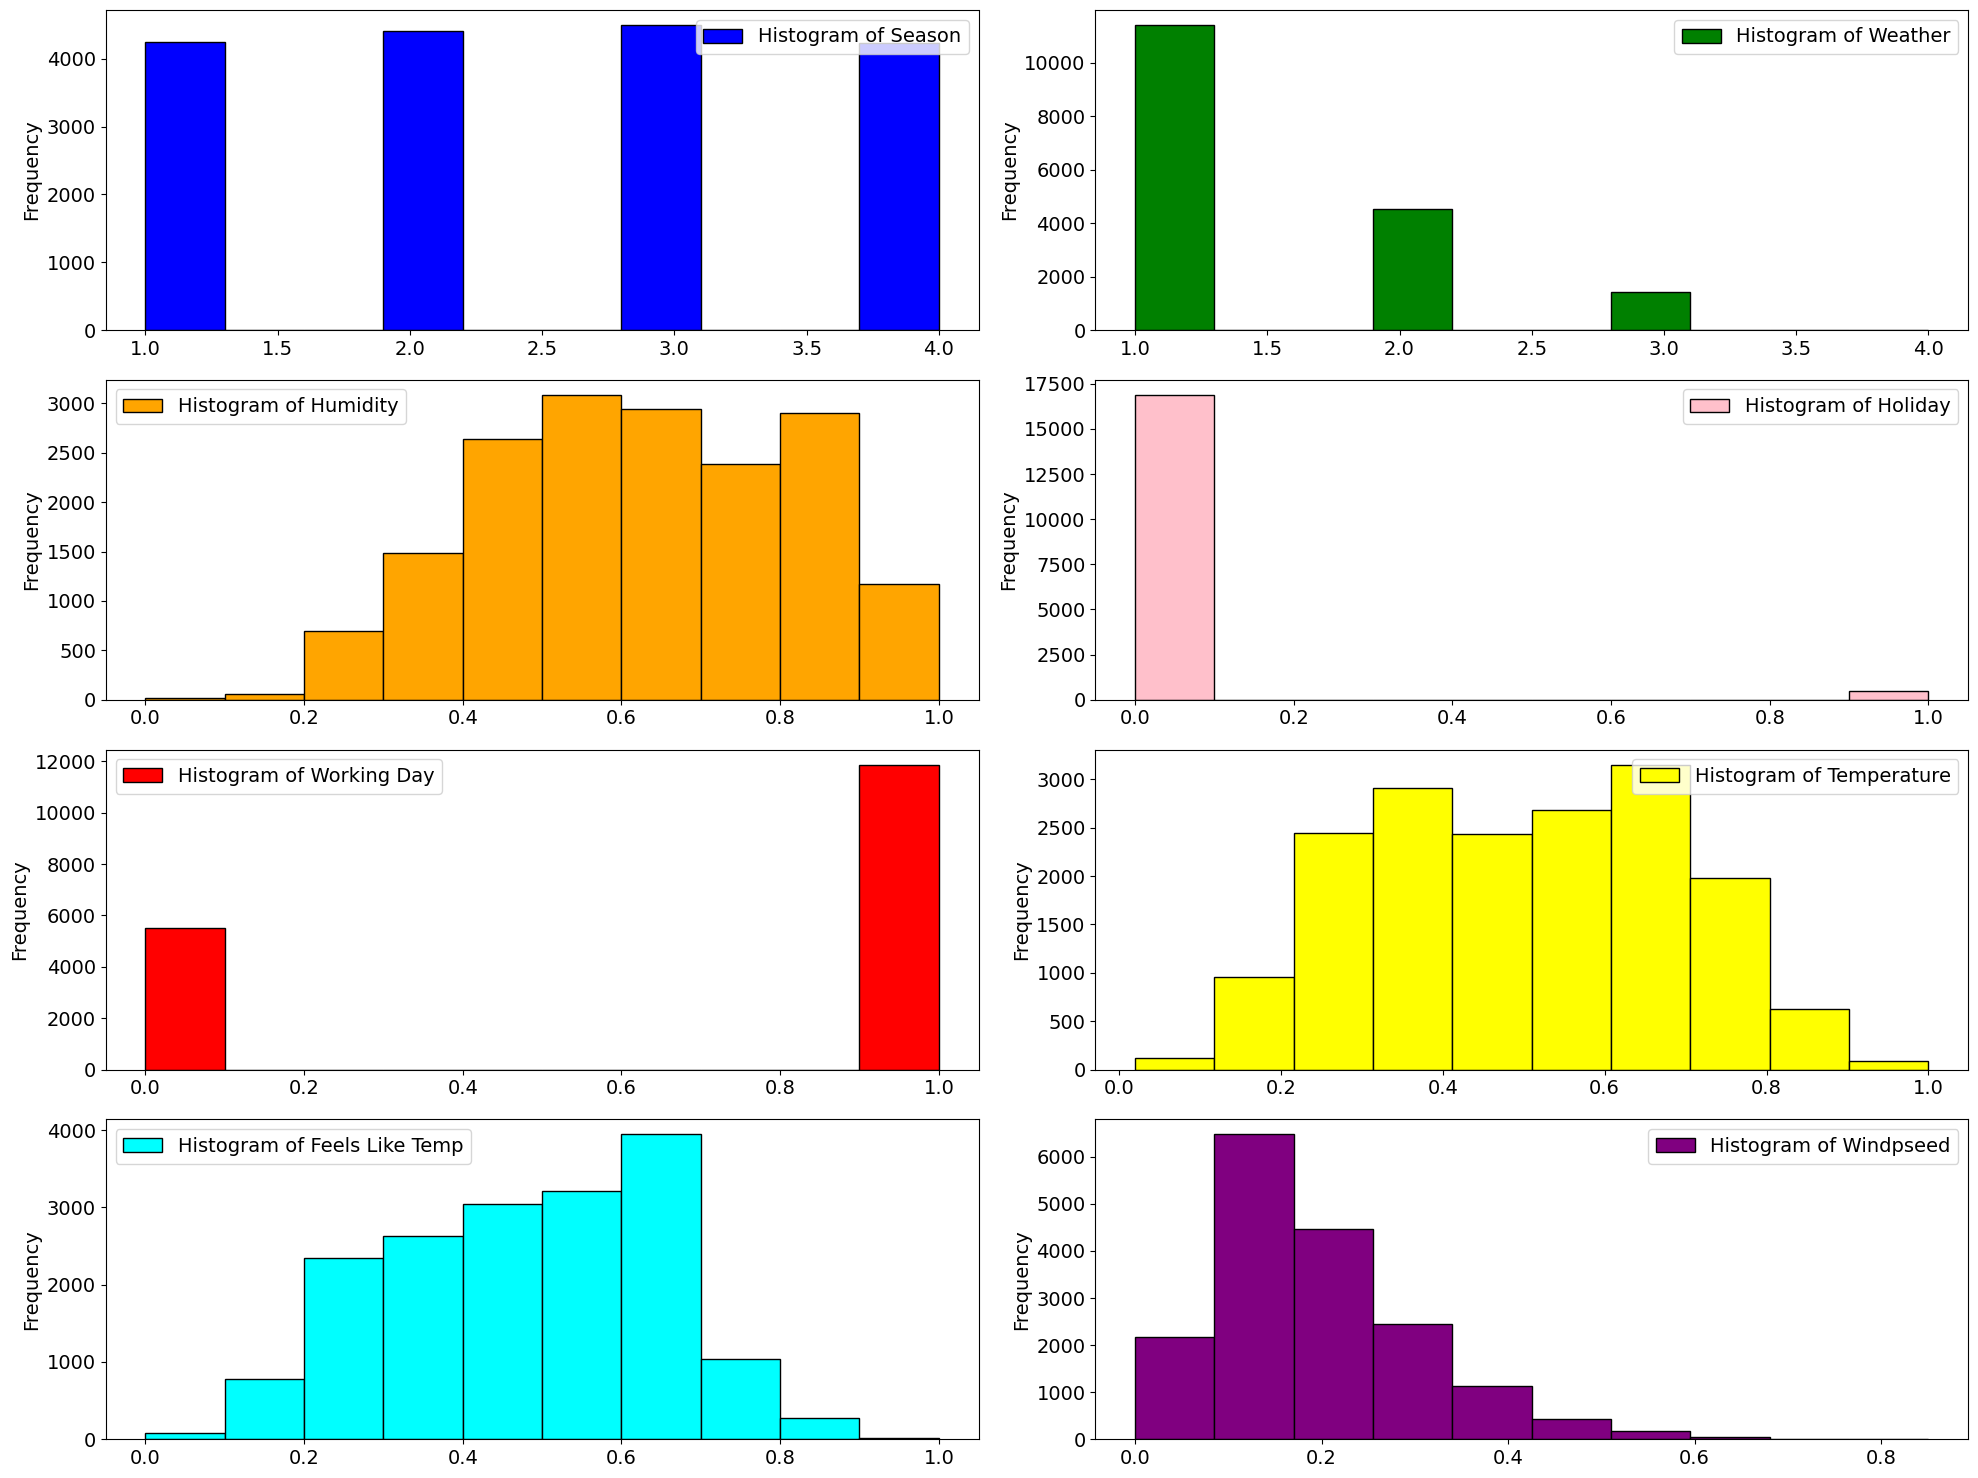

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.subplot(421)
hourData['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
hourData['weathersit'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
hourData['hum'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
hourData['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
hourData['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
hourData['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
hourData['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
hourData['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

Podemos hacer algunas inferencias de los datos observando estos histogramas:
* Season tiene cuatro categorías de distribución casi igual
* El clima 1 tiene una mayor contribución, es decir, un clima mayormente despejado.
* Las variables de temperatura, sensación térmica, humedad y velocidad del viento se ven normalmente distribuidas.

In [13]:
hourData = hourData.drop(columns=['instant', 'dteday', 'casual', 'registered'])
# hourData = hourData.drop(columns=['instant', 'dteday'])

Podríamos analizar muchas más cosas, para entender mejor nuestros datos y conseguir afinar la predicción realizando algunas hipótesis. Por ejemplo:
* Tendencias horarias en el alquiler (datetime variable)
* Influencia del tiempo en el alquiler (extraer buen tiempo y mal tiempo por estaciones y estudiar alquileres)
* Cuándo hay más alquileres por estación
* Las bicicletas se alquilan principalmente para desplazamientos matutinos / vespertinos durante la semana, y sobre todo paseos diurnos los fines de semana.
* Patrones de alquiler entre usuarios registrados y ocasionales.
* Los días laborables, la mayoría de las bicicletas se alquilan en mañanas y noches cálidas.


**Estudio de correlaciones**

Conocer la correlación entre cada variable y la variable objetivo es útil, ya que una correlación alta* implica que existe una relación entre la variable y la variable objetivo. En general, es recomendable incluir variables con una correlación alta porque son las que tienen mayor poder predictivo y omitir variables con una correlación baja porque es probable que sean irrelevantes.

[Text(0.5, 0, 'season'),
 Text(1.5, 0, 'yr'),
 Text(2.5, 0, 'mnth'),
 Text(3.5, 0, 'hr'),
 Text(4.5, 0, 'holiday'),
 Text(5.5, 0, 'weekday'),
 Text(6.5, 0, 'workingday'),
 Text(7.5, 0, 'weathersit'),
 Text(8.5, 0, 'temp'),
 Text(9.5, 0, 'atemp'),
 Text(10.5, 0, 'hum'),
 Text(11.5, 0, 'windspeed'),
 Text(12.5, 0, 'cnt')]

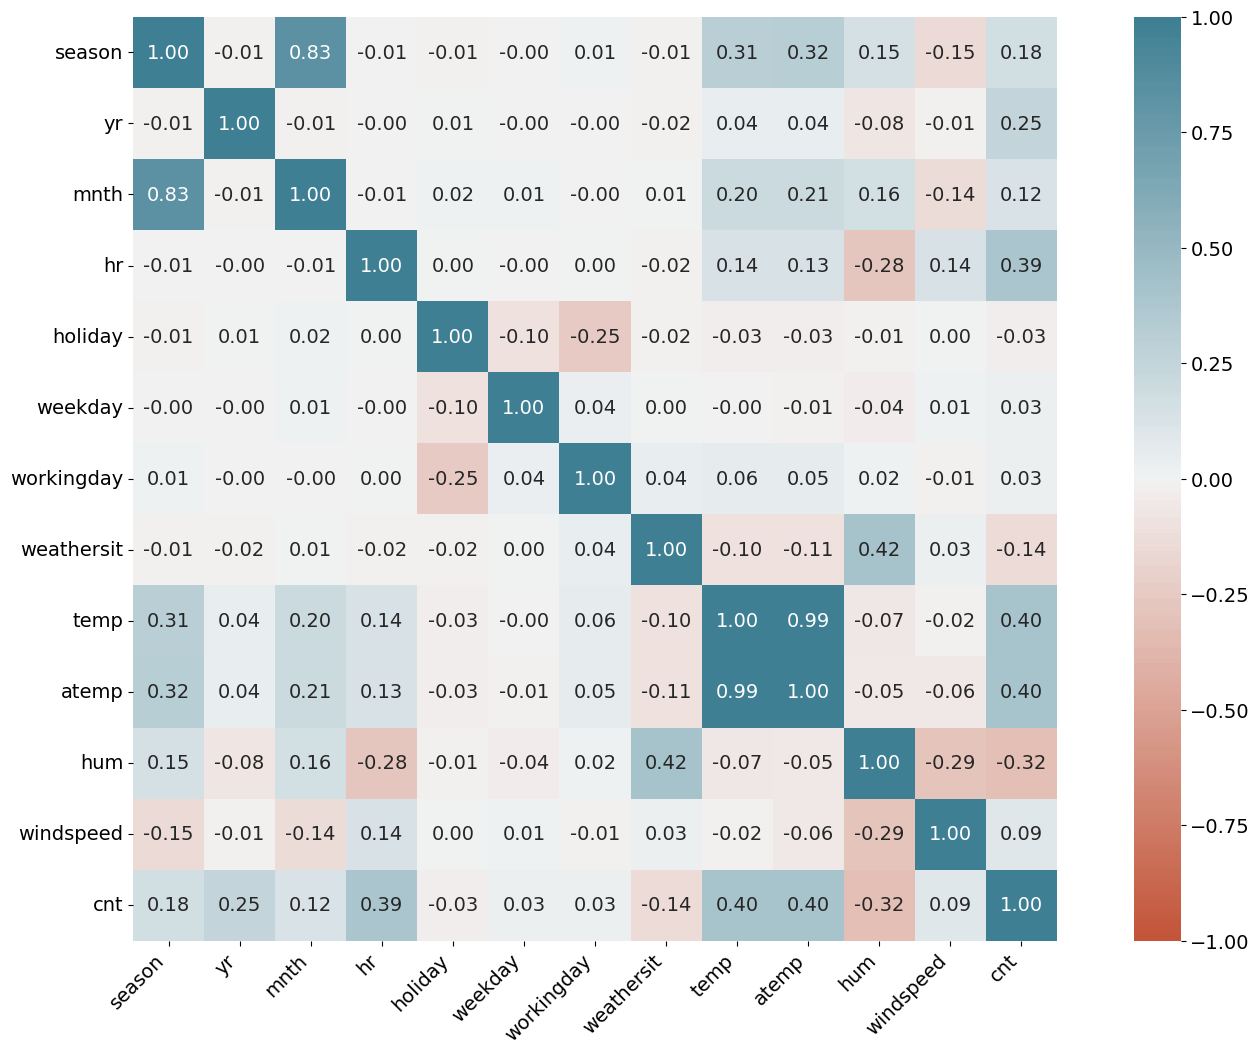

In [14]:
# Calcula coeficiente de correlación de Pearson
corr = hourData.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)


**Pregunta final**

¿podemos reducir la dimensionalidad de nuestros datos? ¿qué variables van a ser más relevantes en nuestros modelos?

En este ejemplo podemos eliminar instant y dteday y también casual y registered ya que no aportan información y añaden dependencia a la variable objetivo (c+r = cnt)

In [15]:
hourData = hourData.drop(columns=['atemp'])

In [16]:
hourData.shape

(17379, 12)

In [17]:
hourData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [18]:
X_hourData = hourData.drop(columns=['cnt'])

## Laboratorio: Árboles y random forest para regresión y clasificación

### Objetivos

Mediante este laboratorio se pretende que aplique los conocimientos adquiridos en los temas de Árboles y Random forest trabajando con un conjunto de datos médico.

### Descripción 

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

En esta primera actividad se trata de familiarizarse con los pasos generales a realizar para generar un modelo de aprendizaje automático. Podemos resumir estos pasos en:
-	Análisis descriptivo de los datos
-	Tratamiento de valores faltantes o nulos
-	Aplicación del algoritmo de aprendizaje automático
-	Evaluación

Para ello, se deben seguir los pasos que indicamos a continuación.
1.	Análisis descriptivo de los datos
2.	Tratamiento de valores faltantes
3.	Entrenamiento de algoritmos
4. Comentarios adicionales



### Importación del dataset

In [19]:
csv = "pima-indians-diabetes.csv"
df = pd.read_csv(csv)
df.head()

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
print("Shape: " + str(df.shape))
print(df.columns)

Shape: (768, 9)
Index(['nEmbarazos', 'concentracionGlucosa', 'presionArterialSistolica',
       'pliegueCutaneo', 'insulinaSerica', 'IMC', 'funcionPediDiabe', 'edad',
       'diabetes'],
      dtype='object')


### Exploración y limpieza de datos (EDA)

In [21]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nEmbarazos                768 non-null    int64  
 1   concentracionGlucosa      768 non-null    int64  
 2   presionArterialSistolica  768 non-null    int64  
 3   pliegueCutaneo            768 non-null    int64  
 4   insulinaSerica            768 non-null    int64  
 5   IMC                       768 non-null    float64
 6   funcionPediDiabe          768 non-null    float64
 7   edad                      768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
data.describe()

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
data.dtypes

nEmbarazos                    int64
concentracionGlucosa          int64
presionArterialSistolica      int64
pliegueCutaneo                int64
insulinaSerica                int64
IMC                         float64
funcionPediDiabe            float64
edad                          int64
diabetes                      int64
dtype: object

[Text(0.5, 0, 'nEmbarazos'),
 Text(1.5, 0, 'concentracionGlucosa'),
 Text(2.5, 0, 'presionArterialSistolica'),
 Text(3.5, 0, 'pliegueCutaneo'),
 Text(4.5, 0, 'insulinaSerica'),
 Text(5.5, 0, 'IMC'),
 Text(6.5, 0, 'funcionPediDiabe'),
 Text(7.5, 0, 'edad'),
 Text(8.5, 0, 'diabetes')]

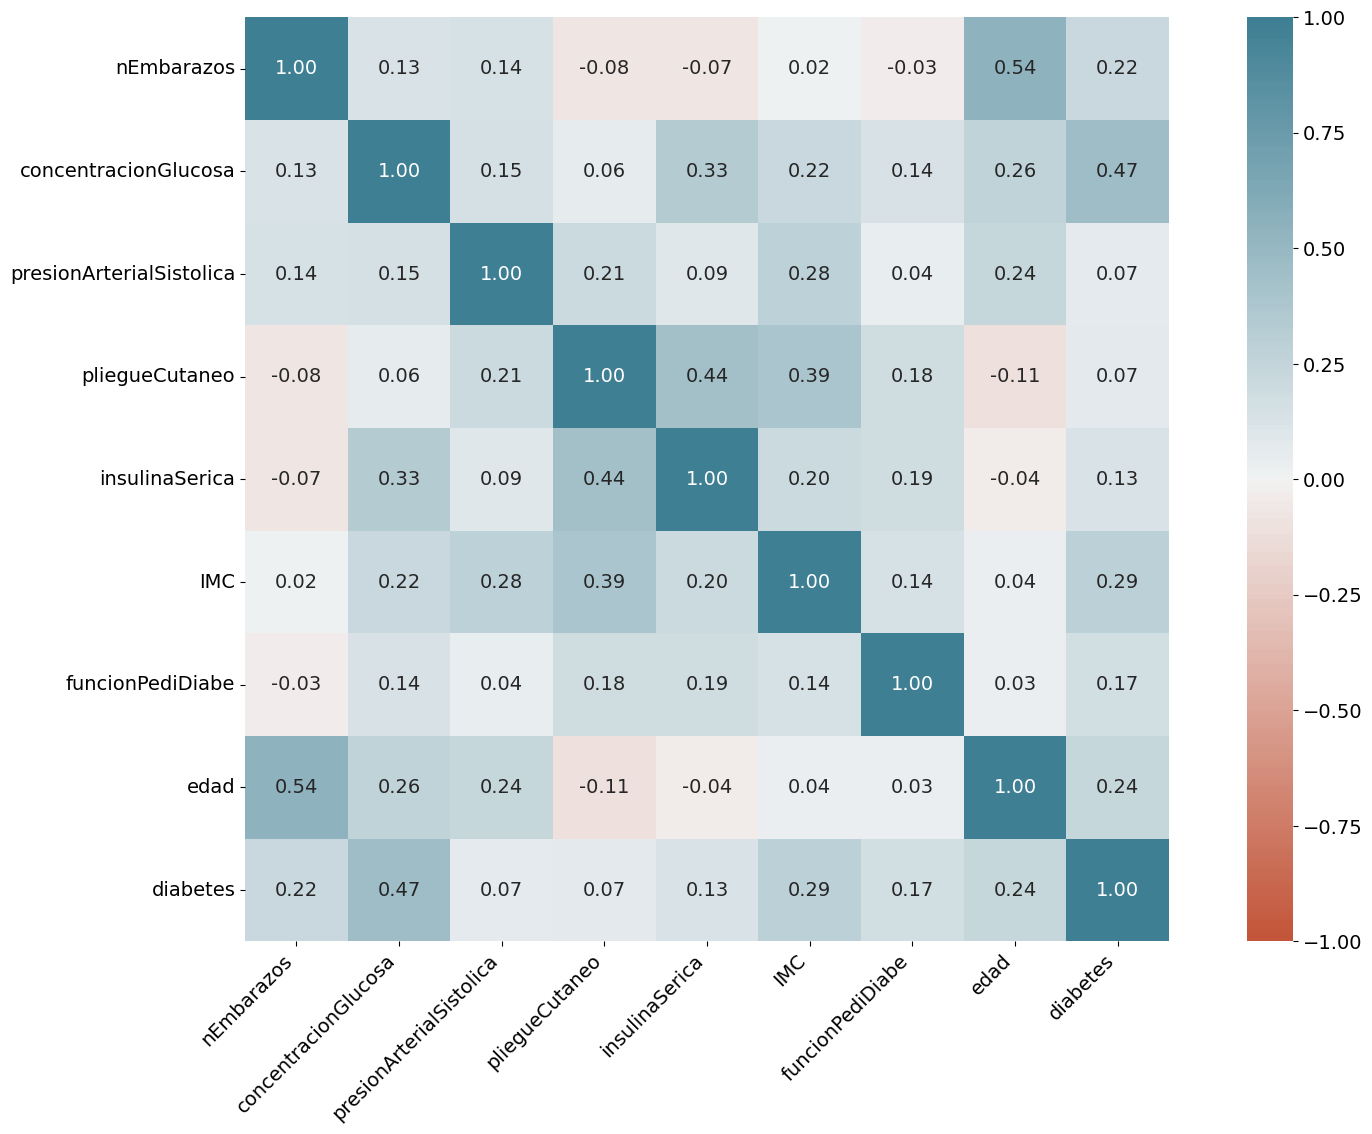

In [24]:
# Calcula coeficiente de correlación de Pearson
corr = data.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)